# Import Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV #GridSearchCV

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/dm.csv")
df.head(10)

,Cust_Id,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,247,Old,Female,Own,Single,Far,47500,0,High,6,755
1,127,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,479,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,475,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,151,Middle,Female,Own,Single,Close,68400,0,High,12,1304
5,320,Young,Male,Own,Married,Close,30400,0,Low,6,495
6,804,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782
7,790,Middle,Male,Own,Single,Close,68400,0,High,18,1155
8,43,Middle,Female,Own,Married,Close,51900,3,Low,6,158
9,475,Old,Male,Own,Married,Far,80700,0,NaN,18,3034


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cust_Id      1000 non-null   int64 
 1   Age          1000 non-null   object
 2   Gender       1000 non-null   object
 3   OwnHome      1000 non-null   object
 4   Married      1000 non-null   object
 5   Location     1000 non-null   object
 6   Salary       1000 non-null   int64 
 7   Children     1000 non-null   int64 
 8   History      697 non-null    object
 9   Catalogs     1000 non-null   int64 
 10  AmountSpent  1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# Pre-Processing

In [5]:
# Treat Missing
df['History'].fillna("missing",inplace=True)

In [8]:
# Partition Data (y = AmountSpent)
y = df['AmountSpent']
X =  df.drop(['AmountSpent','Cust_Id'],axis=1)


In [9]:
# Encode Categorical
X = pd.get_dummies(X, drop_first=True)


In [10]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=200)

# Build Model

In [11]:
param_grid = {
    'n_estimators': [45,46,47,48,49,50,51,52,53,54,55],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['friedman_mse', 'absolute_error', 'squared_error', 'poisson']
}

In [12]:
# Define model
clf = RandomForestRegressor(random_state = 42)

# Grid Search
rgs = RandomizedSearchCV(clf, param_distributions = param_grid)

# Fit
rgs.fit(X_train,y_train)

# Predict
y_train_pred = rgs.predict(X_train)
y_test_pred = rgs.predict(X_test)

# Check Performance
print('---------------------------------------------------------')
print('Train MSE:',mean_squared_error(y_train, y_train_pred))
print('Test MSE:',mean_squared_error(y_test, y_test_pred))
print('---------------------------------------------------------')
print('Train r2_score:',r2_score(y_train, y_train_pred))
print('Test r2_score:',r2_score(y_test, y_test_pred))

---------------------------------------------------------
Train MSE: 103695.19821020313
Test MSE: 237543.89744071008
---------------------------------------------------------
Train r2_score: 0.884141473817659
Test r2_score: 0.7696964647788385


In [13]:
rgs.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_depth=8,
                      max_features='log2', n_estimators=55, random_state=42)

In [15]:
feature_names = rgs.feature_names_in_
feature_names

array(['Salary', 'Children', 'Catalogs', 'Age_Old', 'Age_Young',
       'Gender_Male', 'OwnHome_Rent', 'Married_Single', 'Location_Far',
       'History_Low', 'History_Medium', 'History_missing'], dtype=object)

In [17]:
import numpy as np

# Assuming rgs.best_estimator_ is a RandomForestRegressor or similar
feature_importances = np.mean([
    tree.feature_importances_ for tree in rgs.best_estimator_.estimators_
], axis=0)

# Now you can map it to your feature names
feature_names = rgs.feature_names_in_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


            Feature  Importance
0            Salary    0.337204
2          Catalogs    0.136170
9       History_Low    0.135248
7    Married_Single    0.105373
8      Location_Far    0.062950
10   History_Medium    0.058671
4         Age_Young    0.055483
1          Children    0.038916
11  History_missing    0.024880
6      OwnHome_Rent    0.020975
5       Gender_Male    0.012314
3           Age_Old    0.011816


In [18]:
feat_imp_table = pd.DataFrame({
    'Feature Name': feature_names,
    'Feature Importance': feature_importances
})

# Sort DataFrame by feature importance in descending order
feat_imp_table = feat_imp_table.sort_values('Feature Importance', ascending=False)
feat_imp_table

,Feature Name,Feature Importance
0,Salary,0.337204
2,Catalogs,0.136170
9,History_Low,0.135248
7,Married_Single,0.105373
8,Location_Far,0.062950
10,History_Medium,0.058671
4,Age_Young,0.055483
1,Children,0.038916
11,History_missing,0.024880
6,OwnHome_Rent,0.020975


<Axes: >

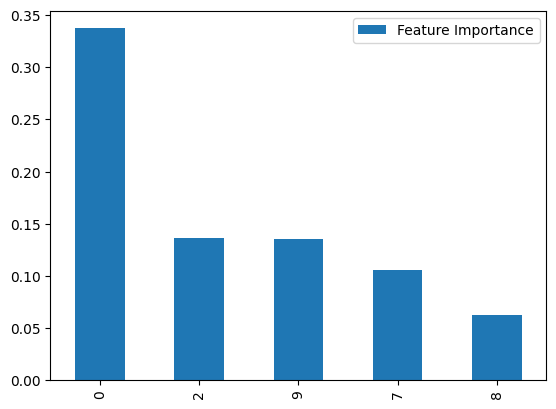

In [19]:
feat_imp_table.head(5).plot.bar()